In [73]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.shape

(614, 13)

In [76]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df.isnull().sum().sum()

149

In [78]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
from scipy import stats as st
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

In [80]:
df=df.dropna(axis=1)

In [102]:
df.isnull().sum()

Loan_ID              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Education          614 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Property_Area      614 non-null    object 
 7   Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 38.5+ KB


In [104]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675
LoanAmount,0.565620,0.187828,1.000000,0.038801
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000


<AxesSubplot:>

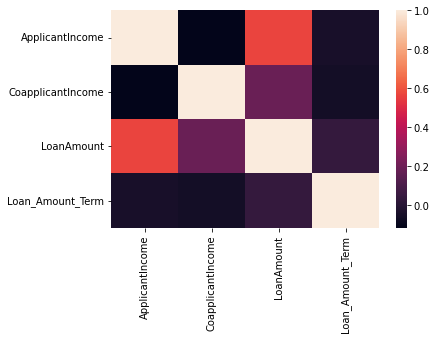

In [105]:
plt.figure()
sns.heatmap(df.corr())

In [106]:
df.columns

Index(['Loan_ID', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [109]:
df.dtypes

Loan_ID               object
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area         object
Loan_Status           object
dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [111]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [112]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [115]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.fit(x_test,y_test)

predict_train=lr.predict(x_train)

In [116]:
predict=lr.predict(x_test)

In [118]:
accuracy_score(y_train,predict_train)

0.6720977596741344

In [119]:
accuracy_score(y_test,predict)

0.7154471544715447